In [1]:
import pandas as pd
import numpy as np
import datetime
from datetime import date, datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

In [2]:
path = 'C:/Users/AUTODESK/Desktop/D/Тестовое задание на должность аналитика - Лист1.csv'
df = pd.read_csv(path)

In [18]:
df.head(5)

,Data,New users organic,New users acquisition,DAU,Returning users day 1,Returning users day 7,Returning users day 28,Paying users,Revenue,ARPU,ARPPU,Paying Share,Retention Day 1,Retention Day 7,Retention Day 28
0,2021-08-01,171850.0,57283.0,1624496.0,93580.0,32769.0,11974.0,18536.0,22025671.0,13.558464,1188.264512,1.141031,0.408409,0.143013,0.052258
1,2021-08-02,125065.0,41688.0,1422218.0,70547.0,24112.0,8066.0,27304.0,29364775.0,20.647169,1075.475205,1.919818,0.423063,0.144597,0.048371
2,2021-08-03,127965.0,42654.0,1374403.0,79981.0,25070.0,8362.0,29838.0,28218527.0,20.531479,945.724479,2.170979,0.468770,0.146936,0.049010
3,2021-08-04,124113.0,41370.0,1399891.0,77386.0,23971.0,7721.0,23771.0,22530919.0,16.094767,947.832190,1.698061,0.467637,0.144855,0.046657
4,2021-08-05,122382.0,40793.0,1392873.0,72951.0,23307.0,7070.0,21272.0,20477162.0,14.701385,962.634543,1.527203,0.447072,0.142834,0.043328


In [4]:
#Тут можно видеть что данные закодированы. Снимем кодировку и переведем тип данных во float
for i in df.DAU.str.split(' '):
    print(i)

['1\xa0624\xa0496']
['1\xa0422\xa0218']
['1\xa0374\xa0403']
['1\xa0399\xa0891']
['1\xa0392\xa0873']
['1\xa0366\xa0728']
['1\xa0455\xa0376']
['1\xa0445\xa0545']
['1\xa0330\xa0308']
['1\xa0281\xa0582']
['1\xa0265\xa0232']
['1\xa0262\xa0400']
['1\xa0284\xa0091']
['553\xa0926']
['1\xa0078\xa0681']
['1\xa0116\xa0423']
['1\xa0147\xa0124']
['1\xa0170\xa0512']
['1\xa0308\xa0455']
['1\xa0581\xa0315']
['1\xa0872\xa0577']
['1\xa0993\xa0482']
['1\xa0812\xa0402']
['1\xa0704\xa0756']
['1\xa0731\xa0149']
['1\xa0713\xa0896']
['1\xa0696\xa0175']
['1\xa0767\xa0225']
['1\xa0765\xa0025']
['1\xa0576\xa0780']


In [5]:
#Меняем тип данных на Float
df['New users organic'] = df['New users organic'].str.replace('\D', '').astype(float)
df['New users acquisition'] = df['New users acquisition'].str.replace('\D', '').astype(float)
df['Returning users day 1'] = df['Returning users day 1'].str.replace('\D', '').astype(float)
df['Returning users day 7'] = df['Returning users day 7'].str.replace('\D', '').astype(float)
df['Returning users day 28'] = df['Returning users day 28'].str.replace('\D', '').astype(float)
df['Paying users'] = df['Paying users'].str.replace('\D', '').astype(float)
df['Revenue'] = df['Revenue'].str.replace('\D', '').astype(float)
df['DAU'] = df['DAU'].str.replace('\D', '').astype(float)
#Меняем формат для даты
df['Data'] = pd.to_datetime(df['Data'], format="%d.%m.%Y")

<ipython-input-5-88396d09355f>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['New users organic'] = df['New users organic'].str.replace('\D', '').astype(float)
<ipython-input-5-88396d09355f>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['New users acquisition'] = df['New users acquisition'].str.replace('\D', '').astype(float)
<ipython-input-5-88396d09355f>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Returning users day 1'] = df['Returning users day 1'].str.replace('\D', '').astype(float)
<ipython-input-5-88396d09355f>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Returning users day 7'] = df['Returning users day 7'].str.replace('\D', '').astype(float)
<ipython-input-5-88396d09355f>:6: FutureWarning: The default value of regex will change from True to False in a 

In [38]:
df[::3]

,Data,New users organic,New users acquisition,DAU,Returning users day 1,Returning users day 7,Returning users day 28,Paying users,Revenue,ARPU,ARPPU,Paying Share,Retention Day 1,Retention Day 7,Retention Day 28
0,2021-08-01,171850.0,57283.0,1624496.0,93580.0,32769.0,11974.0,18536.0,22025671.0,13.558464,1188.264512,1.141031,0.408409,0.143013,0.052258
3,2021-08-04,124113.0,41370.0,1399891.0,77386.0,23971.0,7721.0,23771.0,22530919.0,16.094767,947.832190,1.698061,0.467637,0.144855,0.046657
6,2021-08-07,154242.0,51414.0,1455376.0,95465.0,10288.0,9570.0,22002.0,21733557.0,14.933294,987.799155,1.511774,0.464197,0.050025,0.046534
9,2021-08-10,107344.0,35781.0,1281582.0,65964.0,15436.0,6149.0,13525.0,14309128.0,11.165207,1057.976192,1.055336,0.460884,0.107850,0.042962
12,2021-08-13,137670.0,45890.0,1284091.0,27627.0,22966.0,8220.0,13422.0,15174503.0,11.817311,1130.569438,1.045253,0.150507,0.125114,0.044781
15,2021-08-16,123218.0,41072.0,1116423.0,75963.0,24135.0,7720.0,15386.0,13765777.0,12.330252,894.694982,1.378151,0.462371,0.146905,0.046990
18,2021-08-19,180033.0,60011.0,1308455.0,105934.0,29768.0,8431.0,31193.0,15564014.0,11.894956,498.958548,2.383957,0.441311,0.124011,0.035123
21,2021-08-22,336694.0,112231.0,1993482.0,150779.0,53200.0,15227.0,24558.0,19452283.0,9.757943,792.095570,1.231915,0.335867,0.118505,0.033919
24,2021-08-25,219026.0,73008.0,1731149.0,121458.0,33236.0,9100.0,22204.0,17836185.0,10.303091,803.287020,1.282616,0.415904,0.113809,0.031161
27,2021-08-28,200825.0,66941.0,1767225.0,110935.0,27767.0,9665.0,20036.0,15624633.0,8.841338,779.827960,1.133755,0.414298,0.103699,0.036095


# Retention heatmap

Обычно хитмапы к ретеншену делают по дням для каждого start date. Так как у нас есть только 3 контрольных дня мы сделаем следующее

In [9]:
#транспонирование
heatmap = df.groupby('Data').agg({'Retention Day 1':'max', 'Retention Day 7':'max', 'Retention Day 28':'max'}).transpose()

In [10]:
#нормализация данных по строке. так как ретеншен это уже % оставшихтся пользователей, 
    # то следующим образом я хочу посмотреть в какой день больший % вернулся по отношению к другим данным.
ht_div = heatmap.div(heatmap.max(axis=1), axis=0)

In [11]:
heatmap.iloc[:, ::2]

Data,2021-08-01,2021-08-03,2021-08-05,2021-08-07,2021-08-09,2021-08-11,2021-08-13,2021-08-15,2021-08-17,2021-08-19,2021-08-21,2021-08-23,2021-08-25,2021-08-27,2021-08-29
Retention Day 1,0.408409,0.468770,0.447072,0.464197,0.469752,0.459644,0.150507,0.435581,0.453602,0.441311,0.401314,0.348241,0.415904,0.423010,0.355064
Retention Day 7,0.143013,0.146936,0.142834,0.050025,0.099210,0.109456,0.125114,0.178849,0.137216,0.124011,0.118934,0.095140,0.113809,0.107175,0.108548
Retention Day 28,0.052258,0.049010,0.043328,0.046534,0.044277,0.043294,0.044781,0.055061,0.043001,0.035123,0.035509,0.024806,0.031161,0.033903,0.029481


Видим что пользователи пришедшие 14 августа больше остались рекламой чем остальные. Хитмап ниже это покажет

In [12]:
ht_div.iloc[:, ::3]

Data,2021-08-01,2021-08-04,2021-08-07,2021-08-10,2021-08-13,2021-08-16,2021-08-19,2021-08-22,2021-08-25,2021-08-28
Retention Day 1,0.747886,0.856346,0.850047,0.843979,0.275611,0.846703,0.808136,0.615045,0.761610,0.758671
Retention Day 7,0.706921,0.716024,0.247278,0.533107,0.618447,0.726158,0.612991,0.585778,0.562562,0.512588
Retention Day 28,0.827288,0.738627,0.736675,0.680134,0.708923,0.743895,0.556024,0.536965,0.493302,0.571415


Как мы видим по хитмапу, то больший % оставшихся пользователей полностью принадлежит 14 августа. На 1, 7 и 28 дни пользователи показали большую лояльность по сравнению с другими днями. Возможно в эти дни была введена дополнительная "фича" в игре или сработал хороший таргет

7 и 13 августа наоборот имеют плохие показатели

Кроме того, начальные дни показывали хороший ретеншен по 7 и 28 дням, а где то после 17 августа дела пошли плохо и все меньше пользователей стали оставаться

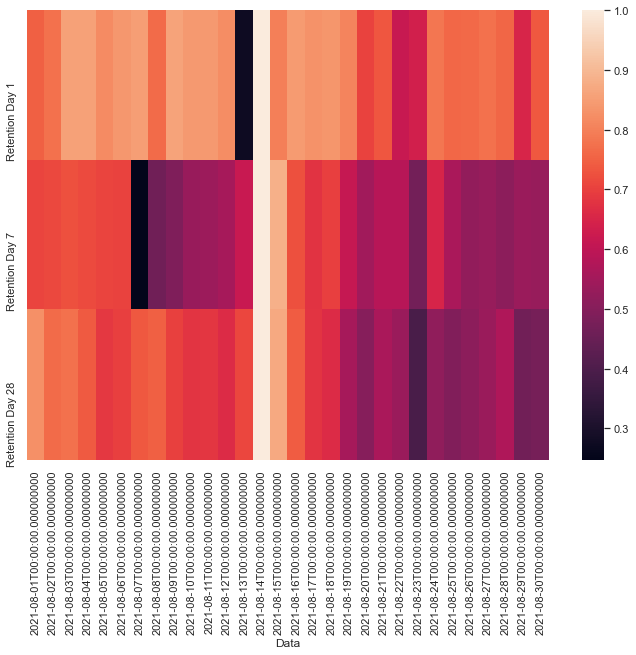

In [13]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=ht_div);

In [14]:
#посмотрим на лидеров и аутсайдеров
df.iloc[[6,7,8,12,13]]

,Data,New users organic,New users acquisition,DAU,Returning users day 1,Returning users day 7,Returning users day 28,Paying users,Revenue,ARPU,ARPPU,Paying Share,Retention Day 1,Retention Day 7,Retention Day 28
6,2021-08-07,154242.0,51414.0,1455376.0,95465.0,10288.0,9570.0,22002.0,21733557.0,14.933294,987.799155,1.511774,0.464197,0.050025,0.046534
7,2021-08-08,150564.0,50187.0,1445545.0,83939.0,18826.0,9509.0,21538.0,20280449.0,14.029621,941.612452,1.489957,0.418125,0.093778,0.047367
8,2021-08-09,123602.0,41200.0,1330308.0,77416.0,16350.0,7297.0,16670.0,16171409.0,12.156139,970.090522,1.253093,0.469752,0.099210,0.044277
12,2021-08-13,137670.0,45890.0,1284091.0,27627.0,22966.0,8220.0,13422.0,15174503.0,11.817311,1130.569438,1.045253,0.150507,0.125114,0.044781
13,2021-08-14,84953.0,28317.0,553926.0,61855.0,22915.0,7155.0,9258.0,5427026.0,9.797384,586.198531,1.671342,0.546085,0.202304,0.063168


14 августа выдает бомбезный результат в 50% ретеншена на второй день. С одной стороны это кажется здорово, но с другой мы видим, что количество новых пользователей по всем каналам просело + ДАУ не радует. А если посмотреть на Revenue то он упал почтив  3 раза по отношению к 13 августа (предыдущий день)

При этом 13 августа значительно просел по оставшимся пользователям на 1 день, а 7 августа просел по пользователям на второй день. 

При этом отношение рекламных к органике примерно 1:3,5 в каждом дне, так что тяжело говорить об успехе рекламной компании. нужно будет копать глубже

In [36]:
lineplot = df.set_index('Data')
lineplot[::3]

,New users organic,New users acquisition,DAU,Returning users day 1,Returning users day 7,Returning users day 28,Paying users,Revenue,ARPU,ARPPU,Paying Share,Retention Day 1,Retention Day 7,Retention Day 28
Data,,,,,,,,,,,,,,
2021-08-01,171850.0,57283.0,1624496.0,93580.0,32769.0,11974.0,18536.0,22025671.0,13.558464,1188.264512,1.141031,0.408409,0.143013,0.052258
2021-08-04,124113.0,41370.0,1399891.0,77386.0,23971.0,7721.0,23771.0,22530919.0,16.094767,947.832190,1.698061,0.467637,0.144855,0.046657
2021-08-07,154242.0,51414.0,1455376.0,95465.0,10288.0,9570.0,22002.0,21733557.0,14.933294,987.799155,1.511774,0.464197,0.050025,0.046534
2021-08-10,107344.0,35781.0,1281582.0,65964.0,15436.0,6149.0,13525.0,14309128.0,11.165207,1057.976192,1.055336,0.460884,0.107850,0.042962
2021-08-13,137670.0,45890.0,1284091.0,27627.0,22966.0,8220.0,13422.0,15174503.0,11.817311,1130.569438,1.045253,0.150507,0.125114,0.044781
2021-08-16,123218.0,41072.0,1116423.0,75963.0,24135.0,7720.0,15386.0,13765777.0,12.330252,894.694982,1.378151,0.462371,0.146905,0.046990
2021-08-19,180033.0,60011.0,1308455.0,105934.0,29768.0,8431.0,31193.0,15564014.0,11.894956,498.958548,2.383957,0.441311,0.124011,0.035123
2021-08-22,336694.0,112231.0,1993482.0,150779.0,53200.0,15227.0,24558.0,19452283.0,9.757943,792.095570,1.231915,0.335867,0.118505,0.033919
2021-08-25,219026.0,73008.0,1731149.0,121458.0,33236.0,9100.0,22204.0,17836185.0,10.303091,803.287020,1.282616,0.415904,0.113809,0.031161


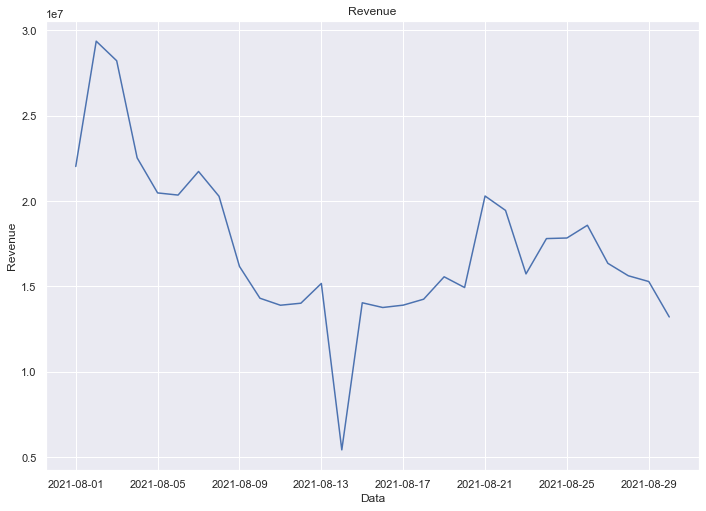

In [29]:
#Строим график Revenue
sns.lineplot(data=lineplot, x=lineplot.index, y='Revenue').set(title='Revenue');

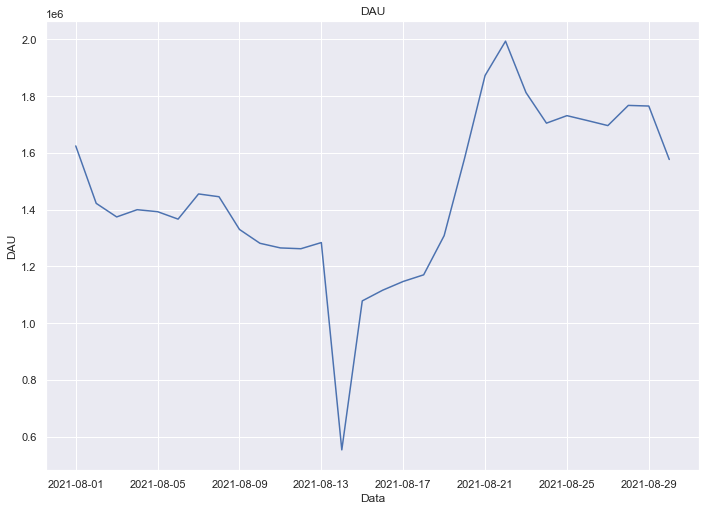

In [39]:
#Строим график DAU
sns.lineplot(data=lineplot, x=lineplot.index, y='DAU').set(title='DAU');

Как было сказано выше - 14 августа показывает хорошие показатели по ретеншену, но если смотреть на картину под другим углом, то мы видим, что просели такие показатели как DAU, Revenue и приток пользователей с различных источников. Если бы у нас были данные по гео, типу устройства или чему то еще - мы смогли бы обьяснить такую просадку. На данный момент мы видим что количество пользоватей упало как по органике так и по рекламе

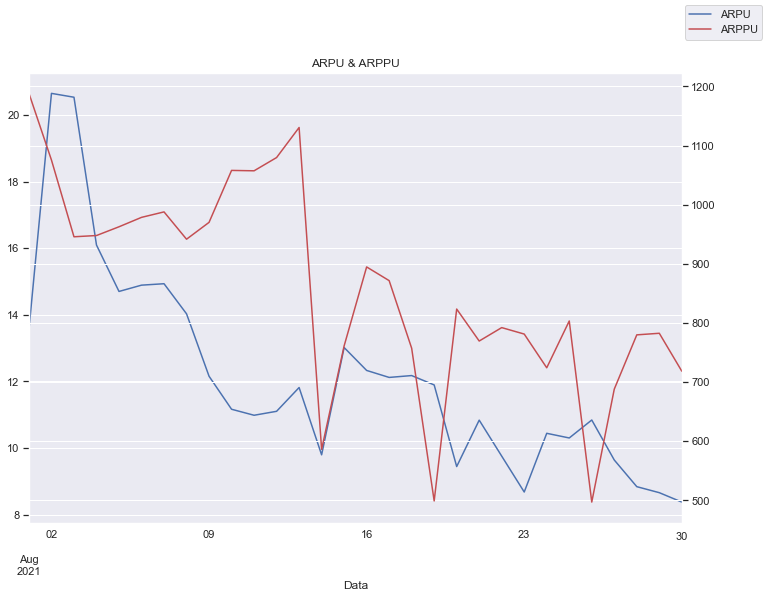

In [35]:
ax = df.plot(x="Data", y="ARPU", legend=False)
ax2 = ax.twinx()
df.plot(x="Data", y="ARPPU", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.title("ARPU & ARPPU")
plt.show()

Тут мы видим очень скачущий график, который говорит о том, что нет сильной зависимости в получении выручки в разрезе платящего и неплатящего пользователей. В какие то дни оба графика показывают рост, в какие то оба показываю падение, также бывают дни когда один показывает рост, а другой падение. Я проверил корреляцию с выходными днями - мало ли мы могли видеть другое поведение по выходным, но нет. На данный момент такое скачущее поведение не обусловлено какими то конкретными факторами. 

Кроме того мы можем наблюдать тенденцию к падению средней выручки по обоим сегментам. Вспоминая график ретеншена (когда пользователи стали сильнее отваливаливаться примерно после 14 августа - мы можем сказать, что эти события взаимосвязаны и нужно смотреть, какие апдейты были выкачены в этот период времени)

# Заключение

Рассмотрев графики Revenue, DAU, ARPU, ARPPU а также изучив другие данные мы можем сделать пару выводов:

1. Нужно обратить внимание на 14 августа. В этот день просели показатели DAU, Revenue, ARPU, ARPUU. Возможно в этот день были выкачены какие то апдейты, которые навредили пользовательскому восприятию игры.

2. После 14 августа значительно вырос показатель DAU. При этом показатели Retention и Revenue снизились по сравнению с докризисной (14 августа) ситуацией. Я отметаю ситуацию с рекламой, так как отношение органики к рекламным оставалось примерно 1:3 на протяжении всего периода. Нужно иметь больше данных чтобы сказать точно. Возможно это баг в приложении, проблема с гео итд.